In [1]:
# Plot of the logistic map for population growth (see https://en.wikipedia.org/wiki/Logistic_map)
# Lucrezia Liuzzi 2021/03/07
# Logistic map equation:
# x_{n+1}=r *x_{n}*(1-x_{n})
# where x_n is a number between zero and one that represents the ratio of existing population to the maximum possible population. 
# parameter r is bound 0 < r < 4 for population x to remain between [0,1]

import numpy as np
import matplotlib.pyplot as plt


In [32]:
N = int(1e3) # number of iterations 
r = np.arange(2.6,4,1e-5) # bifurcation starts at r =3
r = r.reshape(r.shape[0],1)
x0 = np.arange(0.01,1,0.01) # population is bounded between 0 and 1

x = np.zeros((r.shape[0],x0.shape[0]))
x[:] = x0 # initial popuation


In [33]:
# logistic map calculation
for n in range(0,N,1):
    x = r * x * (1 - x)

(2.6, 4)

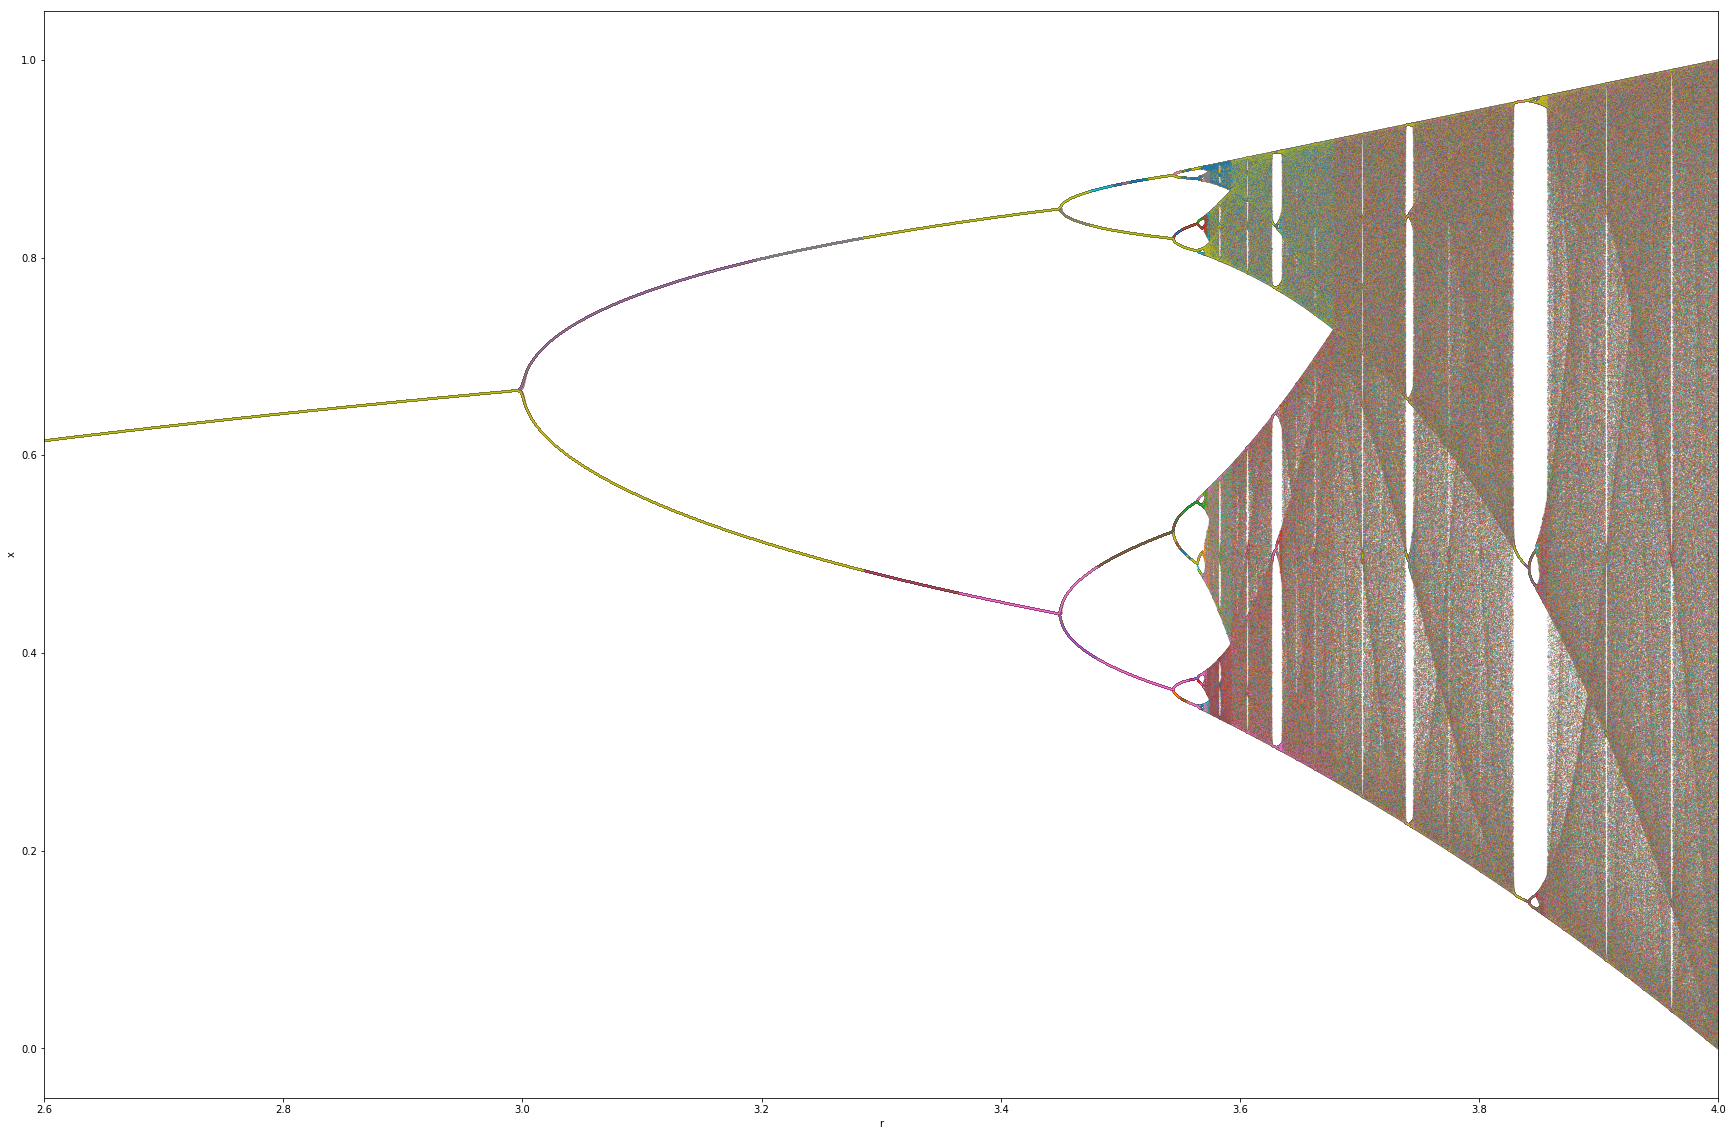

In [40]:
plt.figure(figsize=(30,20))
plt.plot(r,x, '.', markersize=0.2)
plt.xlabel('r')
plt.ylabel('x')
plt.xlim(2.6,4)

(0.2, 0.7)

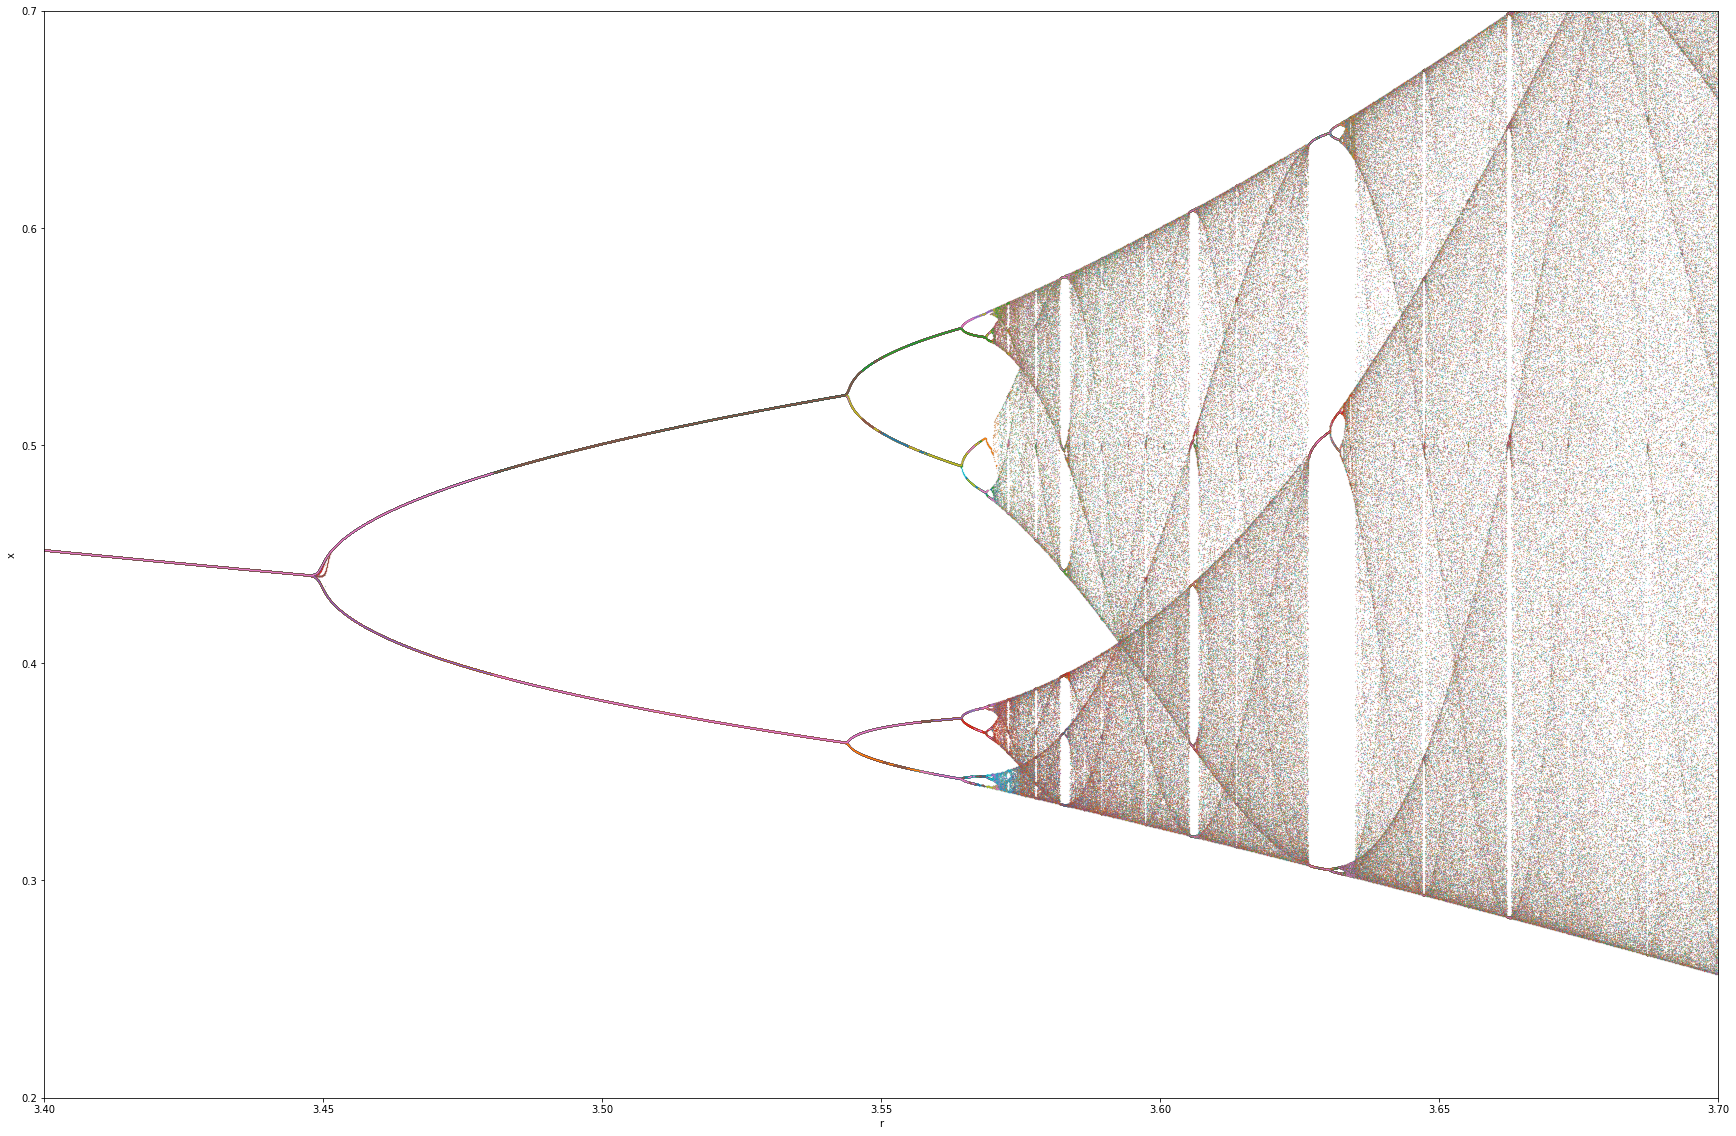

In [39]:
plt.figure(figsize=(30,20))
plt.plot(r,x, '.', markersize=0.2)
plt.xlabel('r')
plt.ylabel('x')
plt.xlim(3.4,3.7)
plt.ylim(0.2,0.7)

In [83]:
## Mandelbrot set
# z_{n+1} = z_{n}^2 + c

# correspondence with logistic map
# z = r * (1/2 -x);   c = r/2 * (1 - r/2),   for r in [1,4]


array([[-2. , -2. , -2. , ..., -2. , -2. , -2. ],
       [-1.9, -1.9, -1.9, ..., -1.9, -1.9, -1.9],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ 1.8,  1.8,  1.8, ...,  1.8,  1.8,  1.8],
       [ 1.9,  1.9,  1.9, ...,  1.9,  1.9,  1.9],
       [ 2. ,  2. ,  2. , ...,  2. ,  2. ,  2. ]])

In [38]:
cp = -.5#1
cn = -.6 #-2
cpj = -.5 #1.5
cnj = -.6 #-1.5
cstep = 1e-5
a, b = np.meshgrid(np.arange(cn,cp+cstep,cstep),np.arange(cnj,cpj+cstep,cstep))
c = a + 1j*b
z = np.zeros(c.shape)

N = 100
cf = c.reshape(-1)
z = np.zeros(cf.shape)*1j # declare as complex

# for n in range(0,N):
#     m = np.abs(z)< np.max(abs(cf))
#     z[m] = np.square(z[m]) + cf[m]


In [39]:
mtemp = np.abs(z)<100 # initialize mtemp
for n in range(0,N):
    z[mtemp] = np.square(z[mtemp]) + cf[mtemp]
    # avoid numbers growing too large for computer to handle
    if np.mod(n,5)==0: # check every 5 iterations
        mtemp = np.logical_and(np.abs(z)<1000, np.abs(z)>1e-4)
    
print(z)
z = z.reshape(c.shape)
m = np.abs(z)<= np.max(abs(c)) # numbers in Mandelbrot set remain bounded to initial range after loop operation
print(m)

[ 2.50330882e+07-1.16026571e+07j  2.46108339e+07-1.20859764e+07j
  2.41806452e+07-1.25561876e+07j ... -4.72773278e-01-2.91165590e-01j
 -4.72709568e-01-2.91207015e-01j -4.72645870e-01-2.91248366e-01j]
[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


Text(0, 0.5, 'I')

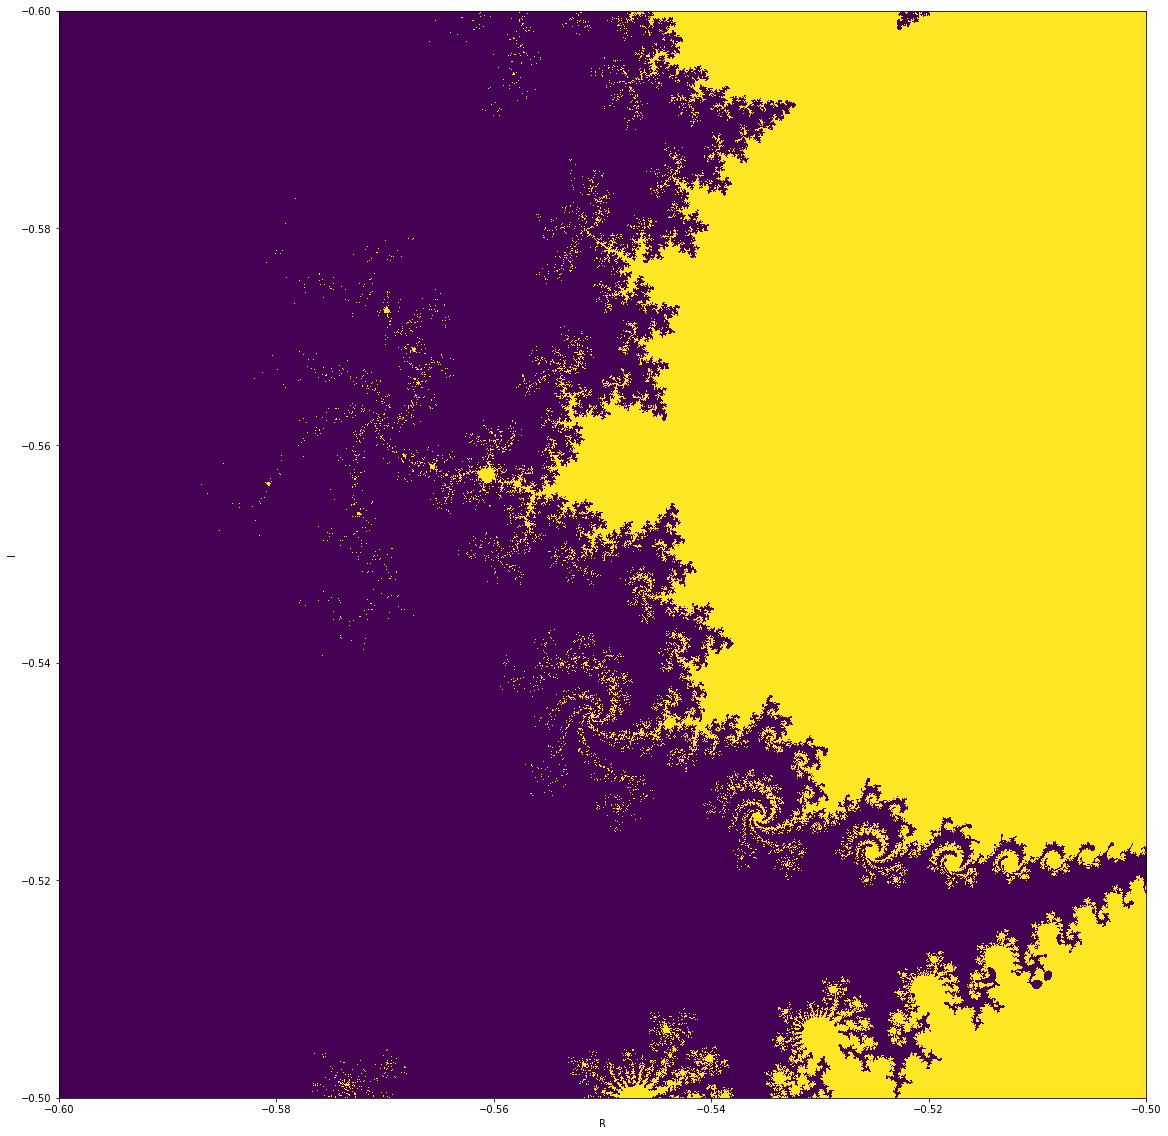

In [41]:
plt.figure(figsize=(20,20))
plt.imshow(m, extent=[-.5*cstep + cn, cp + .5*cstep, cpj +.5*cstep, cnj - .5*cstep])
plt.xlabel('R')
plt.ylabel('I')
# plt.xlim(-.6,-.4)
# plt.ylim(-.5,-.7)